In [1]:
import os, sys
sys.path.insert(0,os.path.pardir)
from src import DataProcessingModule as dp

In [2]:
dir_dict = {
        'raw' : '../data/raw',
        'clean' : '../data/clean_data',
        'process' : '../data/processed',
        'parser' : '../src/datastructure.json',
        'db' : '../data/db'
}
dp_class = dp.DataPreprocessing(dir_dict)

In [3]:
dp_class.processData()

file .DS_Store is moving to raw directory
file .DS_Store is getting deleted from clean_data directory
>>>>> Data files are reset <<<<<<<
>>>>> Data cleaning starts <<<<<<<
new format is ../data/clean_data/full_data.csv
Text or lst file it is 
>>> Created New output File


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('../data/clean_data/full_data.csv', parse_dates={'ETD_DATETIME':['ETD_DATE','ETD_TD_TIME']})


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577850 entries, 0 to 577849
Data columns (total 24 columns):
ETD_DATETIME             577850 non-null datetime64[ns]
ETD_WAYBILL_NO           577850 non-null int64
ETD_ROUTE_NO             577850 non-null int64
ETD_ROUTE_TYPE           577850 non-null int64
ETD_TRIP_NO              577850 non-null int64
ETD_TICKET_TYPE          577850 non-null int64
ETD_ADULTS               577850 non-null int64
ETD_CHILD                577850 non-null int64
ETD_AMOUNT               577850 non-null int64
ETD_DEPOT_CODE           577850 non-null int64
ETD_BATTERY_VOLT         577850 non-null float64
ETD_CUR_STOP_NAME        577850 non-null object
ETD_DST_STOP_NAME        577850 non-null object
ETD_KMS                  577850 non-null int64
ETD_TICKET_TYPE_DESCR    577850 non-null object
ETD_TRIP_DIRECTION       577850 non-null object
ETD_TICKET_NO            577850 non-null int64
ETD_TICKET_SUBNO         577850 non-null int64
ETD_CUR_STOP_NO          577

In [7]:
df.head()

,ETD_DATETIME,ETD_WAYBILL_NO,ETD_ROUTE_NO,ETD_ROUTE_TYPE,ETD_TRIP_NO,ETD_TICKET_TYPE,ETD_ADULTS,ETD_CHILD,ETD_AMOUNT,ETD_DEPOT_CODE,...,ETD_TICKET_TYPE_DESCR,ETD_TRIP_DIRECTION,ETD_TICKET_NO,ETD_TICKET_SUBNO,ETD_CUR_STOP_NO,ETD_CUR_STOP_CODE,ETD_DST_STOP_NO,ETD_DST_STOP_CODE,ETD_CUR_SUB_STAGE,ETD_DST_SUB_STAGE
0,2018-08-01 23:57:13,620278,1,1,1,8,0,0,0,201,...,STAGE CHNGE,U,216253,0,4,5,4,6,0,0
1,2018-08-01 22:50:58,620282,1,1,1,1,1,0,250,201,...,PASSENGER,U,264972,0,1,1,16,42,0,0
2,2018-08-01 21:56:58,620281,1,1,1,1,5,0,725,201,...,PASSENGER,U,215302,0,1,1,9,24,0,0
3,2018-08-01 21:58:11,620281,1,1,1,1,1,0,250,201,...,PASSENGER,U,215303,0,1,1,16,42,0,0
4,2018-08-01 22:30:57,620281,1,1,1,1,2,0,500,201,...,PASSENGER,U,215304,0,1,1,16,42,0,0


In [8]:
df.iloc[0]

ETD_DATETIME             2018-08-01 23:57:13
ETD_WAYBILL_NO                        620278
ETD_ROUTE_NO                               1
ETD_ROUTE_TYPE                             1
ETD_TRIP_NO                                1
ETD_TICKET_TYPE                            8
ETD_ADULTS                                 0
ETD_CHILD                                  0
ETD_AMOUNT                                 0
ETD_DEPOT_CODE                           201
ETD_BATTERY_VOLT                        8.04
ETD_CUR_STOP_NAME                NELAMANGALA
ETD_DST_STOP_NAME                NELAMANGALA
ETD_KMS                                    0
ETD_TICKET_TYPE_DESCR            STAGE CHNGE
ETD_TRIP_DIRECTION                         U
ETD_TICKET_NO                         216253
ETD_TICKET_SUBNO                           0
ETD_CUR_STOP_NO                            4
ETD_CUR_STOP_CODE                          5
ETD_DST_STOP_NO                            4
ETD_DST_STOP_CODE                          6
ETD_CUR_SU

In [9]:
df.columns

Index(['ETD_DATETIME', 'ETD_WAYBILL_NO', 'ETD_ROUTE_NO', 'ETD_ROUTE_TYPE',
       'ETD_TRIP_NO', 'ETD_TICKET_TYPE', 'ETD_ADULTS', 'ETD_CHILD',
       'ETD_AMOUNT', 'ETD_DEPOT_CODE', 'ETD_BATTERY_VOLT', 'ETD_CUR_STOP_NAME',
       'ETD_DST_STOP_NAME', 'ETD_KMS', 'ETD_TICKET_TYPE_DESCR',
       'ETD_TRIP_DIRECTION', 'ETD_TICKET_NO', 'ETD_TICKET_SUBNO',
       'ETD_CUR_STOP_NO', 'ETD_CUR_STOP_CODE', 'ETD_DST_STOP_NO',
       'ETD_DST_STOP_CODE', 'ETD_CUR_SUB_STAGE', 'ETD_DST_SUB_STAGE'],
      dtype='object')

In [10]:
bus_identifier = "ETD_WAYBILL_NO"
route_identifier = "ETD_ROUTE_NO"
qualitative_variables = ["ETD_ROUTE_TYPE","ETD_TICKET_TYPE", "ETD_DEPOT_CODE", "ETD_CUR_STOP_NAME","ETD_DST_STOP_NAME",
                         "ETD_TRIP_DIRECTION"                        
                        ]

quantitative_variables = ["ETD_ADULTS","ETD_CHILD","ETD_AMOUNT", "ETD_BATTERY_VOLT", "ETD_KMS"]



#### Know your variables

In [11]:
# Know the time span of dataset
df["ETD_DATETIME"].describe()

count                  577850
unique                 557100
top       2018-12-11 18:54:47
freq                        4
first     2018-08-01 00:00:29
last      2018-12-31 23:58:46
Name: ETD_DATETIME, dtype: object

In [12]:
# No of buses running on no of routes
df["ETD_WAYBILL_NO"].nunique(), df["ETD_ROUTE_NO"].nunique()

(2867, 1)

In [13]:
(df.groupby("ETD_ROUTE_NO").ETD_WAYBILL_NO.nunique() / df["ETD_WAYBILL_NO"].nunique())*100

ETD_ROUTE_NO
1    100.0
Name: ETD_WAYBILL_NO, dtype: float64

Text(0,0.5,'No of buses percentage')

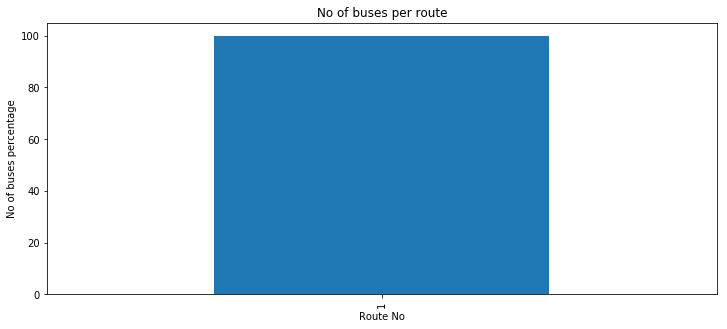

In [14]:
((df.groupby("ETD_ROUTE_NO").ETD_WAYBILL_NO.nunique() / df["ETD_WAYBILL_NO"].nunique())*100).plot(
    kind='bar', figsize=(12,5), title="No of buses per route"
)
plt.xlabel("Route No")
plt.ylabel("No of buses percentage")

In [15]:
# Type of routes and tickets on these route types
df["ETD_ROUTE_TYPE"].value_counts(normalize=True)*100

1    100.0
Name: ETD_ROUTE_TYPE, dtype: float64

Text(0,0.5,'Tickets Percentage')

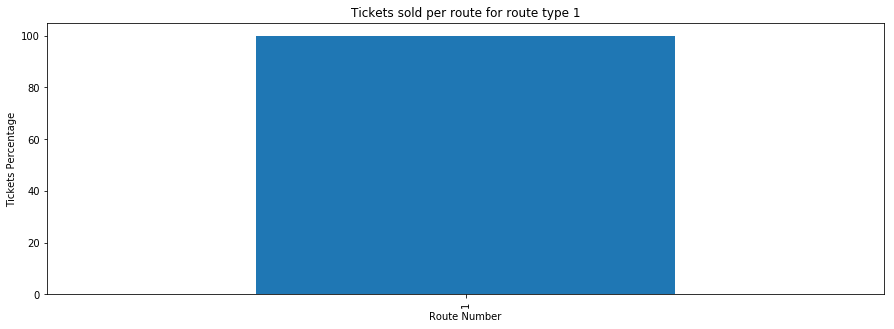

In [20]:
# Tickets sold per route number for give route type

fig, axes = plt.subplots(nrows=1,ncols=1)
route_type_1 = (df[df.ETD_ROUTE_TYPE == 1]["ETD_ROUTE_NO"].value_counts(normalize=True)*100)
# route_type_2 = (df[df.ETD_ROUTE_TYPE == 2]["ETD_ROUTE_NO"].value_counts(normalize=True)*100)
route_type_1.plot(kind="bar", ax=axes, figsize=(15,5), title="Tickets sold per route for route type 1")
# route_type_2.plot(kind="bar", ax=axes[1], figsize=(15,5), title="Tickets sold per route for route type 2")
axes.set_xlabel("Route Number")
# axes[1].set_xlabel("Route Number")
axes.set_ylabel("Tickets Percentage")
# axes[1].set_ylabel("Tickets Percentage")

In [21]:
df["ETD_TICKET_TYPE"].nunique()

28

Text(0,0.5,'Tickets Percentage')

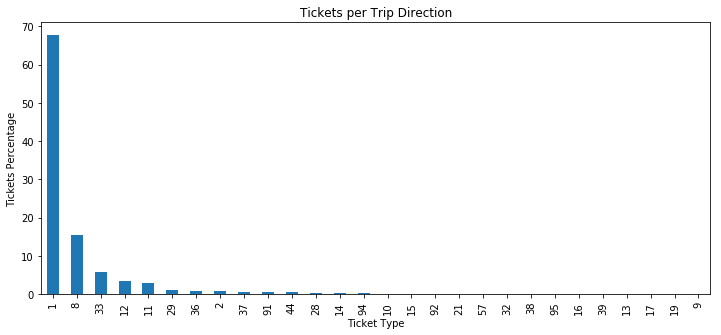

In [22]:
# Type of tickets sold
(df["ETD_TICKET_TYPE"].value_counts(normalize=True)*100).plot(kind='bar', figsize=(12,5), title="Tickets per Trip Direction")

plt.xlabel("Ticket Type")
plt.ylabel("Tickets Percentage")


In [23]:
# How many bus depots
df["ETD_DEPOT_CODE"].unique()

array([201])

In [24]:
# How many stops are there
df["ETD_CUR_STOP_NAME"].nunique(), df["ETD_DST_STOP_NAME"].nunique()

(17, 17)

In [25]:
# No of bus stops
len(set(list(df["ETD_CUR_STOP_NAME"].unique()) + list(df["ETD_DST_STOP_NAME"].unique())))

17

Text(0,0.5,'Tickets Percentage')

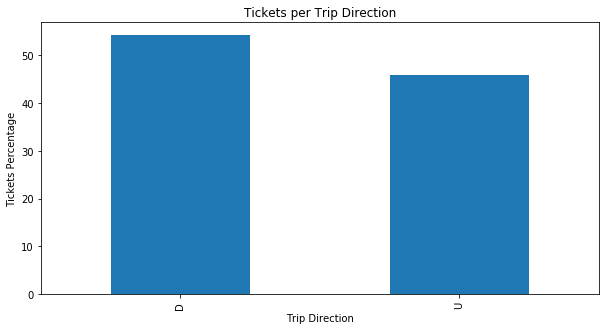

In [26]:
# Tickets distribution per Trip direction
(df["ETD_TRIP_DIRECTION"].value_counts(normalize=True)*100).plot(kind='bar', figsize=(10,5), title="Tickets per Trip Direction")
plt.xlabel("Trip Direction")
plt.ylabel("Tickets Percentage")

In [27]:
# No of adults and children throught the year
df["ETD_ADULTS"].sum(), df["ETD_CHILD"].sum()

(625720, 13239)

In [28]:
# Describe amount
df.ETD_AMOUNT.describe()

count    577850.000000
mean         80.924103
std         116.334072
min           0.000000
25%           0.000000
50%          36.000000
75%         105.000000
max        2820.000000
Name: ETD_AMOUNT, dtype: float64

Text(0.5,1,'Expense Distribution')

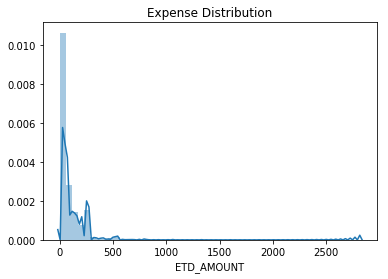

In [29]:
sns.distplot(df.ETD_AMOUNT)
plt.title("Expense Distribution")

In [30]:
# Describe distance between stops in Kilometers
df.ETD_KMS.describe()

count    577850.000000
mean         71.390058
std          85.834624
min           0.000000
25%          12.000000
50%          37.000000
75%          93.000000
max         277.000000
Name: ETD_KMS, dtype: float64

Text(0.5,1,'Distance between stops Distribution')

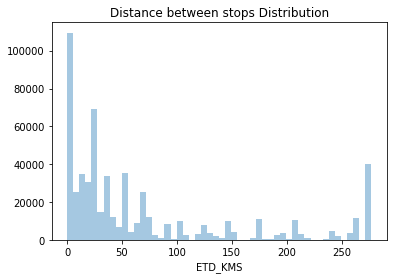

In [31]:
sns.distplot(df.ETD_KMS,kde=False )
plt.title("Distance between stops Distribution")

In [32]:
df[df.ETD_KMS < 0].ETD_KMS.unique()

array([], dtype=int64)

In [33]:
df.ETD_BATTERY_VOLT.describe()

count    577850.000000
mean          7.869607
std           0.174907
min           5.770000
25%           7.760000
50%           7.880000
75%           7.990000
max           9.990000
Name: ETD_BATTERY_VOLT, dtype: float64

Text(0.5,1,'Battery Volt Distribution')

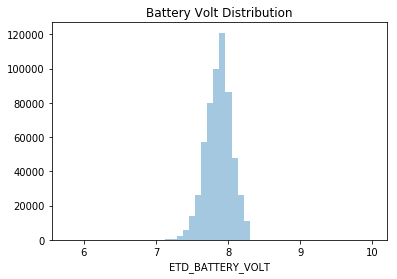

In [34]:
sns.distplot(df.ETD_BATTERY_VOLT, kde=False)
plt.title("Battery Volt Distribution")

### Exploratory Data Analysis Result

- The timeline for this dataset spans from 25 Feb 2018 to 14 Jan 2019, almost 1 year data.
- There are 8 qualtitative variables and 5 quantitative variables.

#### Qualitative Variables Understanding
- There are 295 buses and 39 routes. Most of the buses are running on routes 1, 320 and 352.
- There were 68% of tickets sold on route type 1 and so 32% of tickets sold on route type 2.
- Most busy routes 1 and 320 belongs to route type 1 and 352 belongs to route type 2
- There 28 ticket types. Most ticktets sold on ticket type 1 which is more than 60% of the data.
- This whole data set belongs to only one depot, which is 259.
- There are 244 bus stops.
- More than 50% of tickets were sold for upward direction.

#### Quantitative Variables Understanding
- There were 111075 adults bought tickets and there were 2483 children got tickets throught the year.
- On average the expense per ticket is 54. Though the distributions is highly skewed towards right side.
- Most of the tickets sold for short distances.
- Battery voltage distribution has very less standard deviation. Maximum observations varies between 7.6 to 8.2.

In [35]:
# df[df.ETD_ROUTE_NO == 1].groupby(["ETD_CUR_STOP_NO"]).ETD_CUR_STOP_NAME.unique()

In [36]:
# df[df.ETD_ROUTE_NO == 1].groupby(["ETD_CUR_STOP_CODE"]).ETD_CUR_STOP_NAME.unique()

In [37]:
# df[df.ETD_ROUTE_NO == 1].ETD_CUR_STOP_NAME.unique()

In [38]:
df.ETD_CUR_STOP_NAME.unique()

array(['NELAMANGALA', 'BENGALURU', 'BASAV.BUS.S', 'JHCROSS/DSH', 'KADUR',
       'BIRUR', 'TUMAKURU', 'GUBBI', 'NITTUR', 'KB CROSS', 'TIPTUR',
       'ARSIKERE', 'BANAVARA', 'MATHIGATTA', 'TARIKERE', 'BHADRAVATHI',
       'SHIVAMOGGA'], dtype=object)

In [43]:
df.groupby(["ETD_DST_STOP_NO"]).ETD_DST_STOP_NAME.unique()

ETD_DST_STOP_NO
1       [BENGALURU]
2     [BASAV.BUS.S]
3     [JHCROSS/DSH]
4     [NELAMANGALA]
5        [TUMAKURU]
6           [GUBBI]
7          [NITTUR]
8        [KB CROSS]
9          [TIPTUR]
10       [ARSIKERE]
11       [BANAVARA]
12     [MATHIGATTA]
13          [KADUR]
14          [BIRUR]
15       [TARIKERE]
16    [BHADRAVATHI]
17     [SHIVAMOGGA]
Name: ETD_DST_STOP_NAME, dtype: object

In [45]:
df.ETD_TRIP_NO.unique()

array([1, 2, 3, 5, 6, 4, 7, 8])

In [52]:
df.groupby("ETD_TRIP_NO").ETD_DST_STOP_NAME.unique()

ETD_TRIP_NO
1    [NELAMANGALA, BHADRAVATHI, TIPTUR, TUMAKURU, S...
2    [BHADRAVATHI, BENGALURU, TARIKERE, BIRUR, NITT...
3    [BENGALURU, TUMAKURU, BHADRAVATHI, TARIKERE, B...
4    [BIRUR, ARSIKERE, BENGALURU, TIPTUR, NELAMANGA...
5    [BENGALURU, TIPTUR, BHADRAVATHI, SHIVAMOGGA, A...
6    [TARIKERE, ARSIKERE, KADUR, BIRUR, BASAV.BUS.S...
7    [BENGALURU, SHIVAMOGGA, TIPTUR, GUBBI, KB CROS...
8    [TARIKERE, BHADRAVATHI, ARSIKERE, TUMAKURU, BE...
Name: ETD_DST_STOP_NAME, dtype: object

In [50]:
df.groupby(["ETD_ROUTE_NO","ETD_TRIP_DIRECTION"]).ETD_WAYBILL_NO.nunique()

ETD_ROUTE_NO  ETD_TRIP_DIRECTION
1             D                     2809
              U                     2821
Name: ETD_WAYBILL_NO, dtype: int64

In [54]:
df.groupby(["ETD_TRIP_NO"]).ETD_WAYBILL_NO.nunique()

ETD_TRIP_NO
1    2744
2    2765
3     132
4      38
5       8
6       3
7       2
8       1
Name: ETD_WAYBILL_NO, dtype: int64

In [60]:
# df.ETD_TICKET_NO.value_counts()

In [61]:
df[df.ETD_TICKET_NO == 8105].head()

,ETD_DATETIME,ETD_WAYBILL_NO,ETD_ROUTE_NO,ETD_ROUTE_TYPE,ETD_TRIP_NO,ETD_TICKET_TYPE,ETD_ADULTS,ETD_CHILD,ETD_AMOUNT,ETD_DEPOT_CODE,...,ETD_TICKET_TYPE_DESCR,ETD_TRIP_DIRECTION,ETD_TICKET_NO,ETD_TICKET_SUBNO,ETD_CUR_STOP_NO,ETD_CUR_STOP_CODE,ETD_DST_STOP_NO,ETD_DST_STOP_CODE,ETD_CUR_SUB_STAGE,ETD_DST_SUB_STAGE
261650,2018-10-11 14:47:46,627042,1,1,2,1,2,1,75,201,...,PASSENGER,D,8105,0,8,21,7,17,0,0
441981,2018-11-27 09:39:30,631653,1,1,2,11,6,0,0,201,...,STUDENT PAS,D,8105,0,14,35,13,34,0,0
442802,2018-11-27 04:32:09,631646,1,1,1,8,0,0,0,201,...,STAGE CHNGE,U,8105,0,16,42,16,42,0,0
446492,2018-11-28 22:19:01,631817,1,1,1,12,1,0,0,201,...,GENERAL PAS,U,8105,0,7,17,9,24,0,0
456217,2018-11-30 14:58:17,631989,1,1,1,1,1,0,30,201,...,PASSENGER,U,8105,0,9,24,10,28,0,0
